Make the following graph. You need to implement an automatic higher or lower game

Set the bounds to between 1 to 20. The graph has to keep guessing (max number of guesses is 7) where if the guess is correct, then it stops but if not we keep looping until we hit the max limit. 

Each time a number is guessed, the hint node should say higher or lower and the graph should account for this information and guess the next guess accordingly

input: {"player_name": "student", "guesses": [], "attempts": 0, "lower_bound": 1, "upper_bound":20}

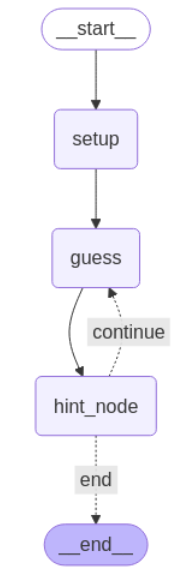

In [11]:
from IPython.display import Image, display

display(Image(filename='imgs/05_graph_exercise.png'))

In [12]:
from typing import TypedDict, List
from langgraph.graph import StateGraph, START, END
import random
import logging

logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(name)s - %(levelname)s - %(message)s')
logger = logging.getLogger(__name__)

In [13]:
class AgentState(TypedDict):
    player_name: str
    guesses: List[str]
    target_number: int
    attempts: str
    lower_bound: int
    upper_bound: int


In [14]:
def setup_node(state:AgentState) -> AgentState:
    """
    This node sets up the information about the player
    """
    try:
        state["player_name"] = f"Hi, {state['player_name']} welcome to the guessing game! I'm thinking of a number between {state['lower_bound']} and {state['upper_bound']}"
        print(state["player_name"])
        print("-"*50)
        state["target_number"] = random.randint(state["lower_bound"], state["upper_bound"])
        return state

    except Exception as e:
            logger.error(f"Error in assistant node: {e}")


In [15]:
def guess_node(state:AgentState) -> AgentState:
    """
    This node generates a random number from 1 to 20
    """  
    try:
        state["guesses"].append(random.randint(state["lower_bound"], state["upper_bound"]))
        state["attempts"] += 1
        print(f"Attempt {state['attempts']}: Guessing {state['guesses'][-1]} (Current range: {state['lower_bound']}-{state['upper_bound']})")
        return state

    except Exception as e:
        logger.error(f"Error in assistant node: {e}")

In [16]:

def hint_node(state:AgentState) -> AgentState:
    """
    This node gives you a hint
    """
    try:
        if state["guesses"][-1] < state["target_number"]:
            print(f"{state['guesses'][-1]} is too low, try again!")
            print("-"*50)
            state["lower_bound"] = state["guesses"][-1]
            return state
        
        elif state["guesses"][-1] > state["target_number"]:
            print(f"{state['guesses'][-1]} is too high, try again!")
            print("-"*50)
            state["upper_bound"] = state["guesses"][-1]
            return state

        else:
            print(f"Congratulations! You guessed the right number!")

        return state

    except Exception as e:
        logger.error(f"Error in assistant node: {e}")


In [17]:


def should_continue(state:AgentState) -> AgentState:
    """
    This node decides if we should continue trying
    """
    try:
        if state["guesses"][-1] == state["target_number"]:
            return "end"

        elif state["attempts"] < 7:
            print(f"We continue trying...")
            return "continue"
        else:
            return "end"
    except Exception as e:
            logger.error(f"Error in assistant node: {e}")

In [18]:
graph = StateGraph(AgentState)

graph.add_node("setup", setup_node)
graph.add_node("guess", guess_node)
graph.add_node("hint_node", hint_node)

graph.add_edge("setup", "guess")
graph.add_edge("guess", "hint_node")

graph.add_conditional_edges(
    "hint_node", 
    should_continue,
    {
        "continue": "guess",
        "end" : END


    }
)

graph.set_entry_point("setup")

app = graph.compile()

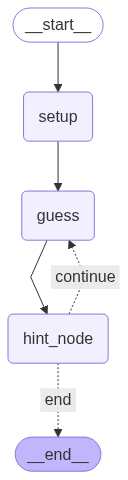

In [19]:
# display the graph created

from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [20]:
results = app.invoke({"player_name": "student", "guesses": [], "attempts": 0, "lower_bound": 1, "upper_bound":20})

Hi, student welcome to the guessing game! I'm thinking of a number between 1 and 20
--------------------------------------------------
Attempt 1: Guessing 10 (Current range: 1-20)
10 is too low, try again!
--------------------------------------------------
We continue trying...
Attempt 2: Guessing 12 (Current range: 10-20)
12 is too low, try again!
--------------------------------------------------
We continue trying...
Attempt 3: Guessing 13 (Current range: 12-20)
13 is too low, try again!
--------------------------------------------------
We continue trying...
Attempt 4: Guessing 15 (Current range: 13-20)
15 is too high, try again!
--------------------------------------------------
We continue trying...
Attempt 5: Guessing 15 (Current range: 13-15)
15 is too high, try again!
--------------------------------------------------
We continue trying...
Attempt 6: Guessing 14 (Current range: 13-15)
Congratulations! You guessed the right number!
